# Labs 1-2 and Homework summary

This notebook is a summary of what we have completed in the course so far. It covers the bay bridge traffic count data (Lab 1 Data.ipnb), the census data, and Linear Algebra for lab 2 and analysis for homework questions.

In this class, we use the datascience library often, to find documentation of some of the functions and methods available in this library, visit http://data8.org/datascience/

In [2]:
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plots
import matplotlib.dates as mdates
import pandas as pd

# Bay Bridge traffic count 


We are given the traffic flow of 5 lanes on the Bay Bridge for one week.

In [102]:
data = Table.read_table('pems_output.csv')
data

Hour,Lane 1 Flow (Veh/Hour),Lane 2 Flow (Veh/Hour),Lane 3 Flow (Veh/Hour),Lane 4 Flow (Veh/Hour),Lane 5 Flow (Veh/Hour),Flow (Veh/Hour),# Lane Points,% Observed
1/14/2016 0:00,34,347,372,291,119,1163,60,100
1/14/2016 1:00,20,199,295,230,74,818,60,100
1/14/2016 2:00,17,248,342,267,114,988,60,100
1/14/2016 3:00,158,427,433,347,164,1529,60,100
1/14/2016 4:00,883,1033,912,737,543,4108,60,100
1/14/2016 5:00,2037,1944,1734,1617,1594,8926,60,100
1/14/2016 6:00,1838,1844,1709,1715,1626,8732,60,100
1/14/2016 7:00,1790,1883,1760,1720,1627,8780,60,100
1/14/2016 8:00,1739,1820,1686,1621,1617,8483,60,100
1/14/2016 9:00,1709,1705,1681,1591,1631,8317,60,100


First we learned how to graph the data using line graphs and scatter plots

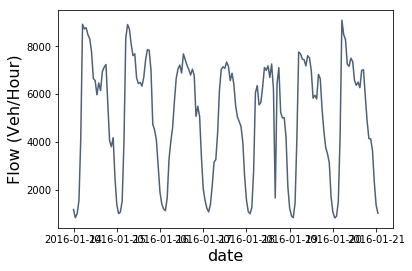

In [103]:
#First we graphed the total flow in all 5 lanes using line plots   
data['date'] = pd.to_datetime(data['Hour']) #Use the Pandas' to_datetime method to convert the hours given to military time [0:00-23:59]
Lane_data = data.select(['date','Flow (Veh/Hour)']) #We are only interested total flow, which is in the 'Flow (Veh/Hour)' column
Lane_data.plot('date') #.plot method draws the line graph of the data


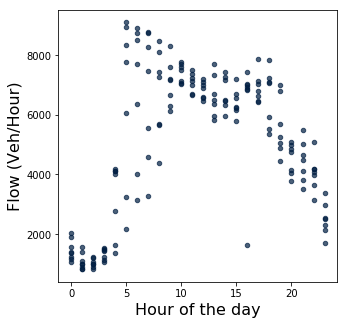

In [104]:
#We also learned how to graph the data using scatter plot 
data['Hour of the day'] = pd.to_datetime(data['Hour']).hour #Use the Pandas .hour attribute to make a column to indicate what hour of the day the row came from[0-24]   
data.select(['Hour of the day','Flow (Veh/Hour)']).scatter('Hour of the day')

In the homework, we applied the datascience library to manipulate this data set to extract information and solve problems. 

In problem 5 of the homework, we were asked to study the lane with the most flow between 8-11pm. To accomplish this, you could filter the data to only include data from that time period.

In [105]:
#Only include data from 8-11 pm
filtered_data = data.where((data['Hour of the day'] >= 20) & (data['Hour of the day'] <= 23)) 
#Filter to only see lane flow
filtered_data = filtered_data.select(['Lane 1 Flow (Veh/Hour)', 'Lane 2 Flow (Veh/Hour)', 'Lane 3 Flow (Veh/Hour)', 'Lane 4 Flow (Veh/Hour)','Lane 5 Flow (Veh/Hour)'])    
                    

In [106]:
#To find the total flow of each lane, use numpy's sum function to add up the values in each column
np.sum(filtered_data)

/srv/app/venv/lib/python3.6/site-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


Lane 1 Flow (Veh/Hour),Lane 2 Flow (Veh/Hour),Lane 3 Flow (Veh/Hour),Lane 4 Flow (Veh/Hour),Lane 5 Flow (Veh/Hour)
21698,28251,25420,21102,11924


Comparing these values gives the solution that Lane 2 had the most flow. The same process can be used to find the lane with the least flow for any time interval of the day. 

# Census Data 

We also worked with census data from the bay area


In [107]:
#Import the csv into a table
data = Table.read_table('bay_area_census_age.csv')
data

STATE,COUNTY,NAME,Total Population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
6,1,Census Tract 4001,2937,1461,1476,150,122,91,88,85,129,126,163,210,206,281,310,342,238,147,110,75,64,6882245,0,37.8676,-122.232
6,1,Census Tract 4002,1974,971,1003,138,98,64,46,72,184,181,183,174,105,113,128,165,140,84,44,25,30,595106,0,37.8482,-122.25
6,1,Census Tract 4003,4865,2228,2637,320,219,143,174,211,495,526,518,475,339,356,314,282,198,90,78,53,74,1105328,0,37.8406,-122.254
6,1,Census Tract 4004,3703,1711,1992,255,168,94,85,234,486,446,398,332,223,213,210,206,132,78,55,42,46,703688,0,37.8482,-122.257
6,1,Census Tract 4005,3517,1677,1840,184,133,86,92,313,495,468,353,261,253,187,179,199,109,67,32,49,57,588111,0,37.8485,-122.265
6,1,Census Tract 4006,1571,723,848,64,60,59,66,156,199,200,145,107,107,113,96,55,51,20,25,21,27,297855,0,37.842,-122.265
6,1,Census Tract 4007,4206,1997,2209,203,184,152,160,359,448,407,371,328,315,288,249,233,163,88,79,83,96,880513,0,37.8418,-122.272
6,1,Census Tract 4008,3594,1745,1849,193,145,139,179,269,389,421,305,259,225,240,200,188,146,92,73,59,72,695230,0,37.8454,-122.283
6,1,Census Tract 4009,2302,1127,1175,134,116,105,122,191,221,214,188,198,171,173,130,120,64,52,35,30,38,425163,0,37.8395,-122.28
6,1,Census Tract 4010,5678,2671,3007,326,311,328,341,476,580,557,529,381,392,389,344,268,142,86,61,87,80,1154123,0,37.8312,-122.272


First we wanted to find the census track closest to the Channing-Bowditch apartment with location (37.867495, -122.257617). We used the .apply method from the datascience library to apply a function to each row to calculate its track's distance to Channing-Bowditch. 

In [110]:
#This helper function was given. It calculates the distance between any two locations given their longitude and latitude
def distance_on_sphere(lat1, long1, lat2, long2):

    # Convert latitude and longitude to spherical coordinates in radians.
    degrees_to_radians = np.pi/180.0
        
    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
        
    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
        
    # We can compute spherical distance from spherical coordinates.
    cos = (np.sin(phi1)*np.sin(phi2)*np.cos(theta1-theta2)+
           np.cos(phi1)*np.cos(phi2))
    arc = np.arccos( cos )

    # Multiply arc by the radius of the earth to get length.
    return 3960.*arc #to get distance in miles

In [114]:
#Coordinates for Channing-Bowditch
lat1, lon1 = 37.867495, -122.257617

#To calculate the distance from the Channing-Bowditch apartments to each tract, we used a lambda expression 
#(a way of defining a function in one line) to make a function that plugs in its two parameters (lat2, lon2) 
#into the last two inputs of the distance_on_sphere with the coordinates of Channing Bowditch in its first two inputs. We saved the oput of the apply to a column labeled 'distance to Channing' 
data['distance to Channing'] = data.apply(lambda lat2, lon2 : distance_on_sphere(lat1, lon1, lat2, lon2), 
                                          ['INTPTLAT10', 'INTPTLON10'])



# Select the row where 'distance to Channing' is minimum. 
# This is the closest census tract to the Channing Apartments
channing_tract = data.where(data['distance to Channing'] == min(data['distance to Channing']))
channing_tract



/srv/app/venv/lib/python3.6/site-packages/datascience/tables.py:361: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


STATE,COUNTY,NAME,Total Population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,distance to Channing
6,1,Census Tract 4228,8368,4131,4237,15,11,8,4020,3112,380,196,121,95,83,95,100,62,38,10,11,4,7,408570,0,37.8668,-122.26,0.13784


We also generated a bar graph from this data.

In [128]:
#This function was given, it switches the columns and rows like a transpose
def rotate_table(table):
    '''transforms a 2 x n table to be an n x 2 table'''
    return Table().with_columns(['Columns', list(table.labels),
                                 'Values', list(table.to_array()[0])])

In [150]:
#We are only interested in the numerical data for each age group
tograph = channing_tract.select(['Under 5 years', '5 to 9 years', '10 to 14 years',
                                 '15 to 19 years','20 to 24 years','25 to 29 years',
                                 '30 to 34 years','35 to 39 years','40 to 44 years',
                                 '45 to 49 years','50 to 54 years','55 to 59 years',
                                 '60 to 64 years','65 to 69 years','70 to 74 years',
                                 '75 to 79 years','80 to 84 years','85 years and over'])
tograph = rotate_table(tograph) #Rotate so that each row represents a different age group
tograph

Columns,Values
Under 5 years,15
5 to 9 years,11
10 to 14 years,8
15 to 19 years,4020
20 to 24 years,3112
25 to 29 years,380
30 to 34 years,196
35 to 39 years,121
40 to 44 years,95
45 to 49 years,83


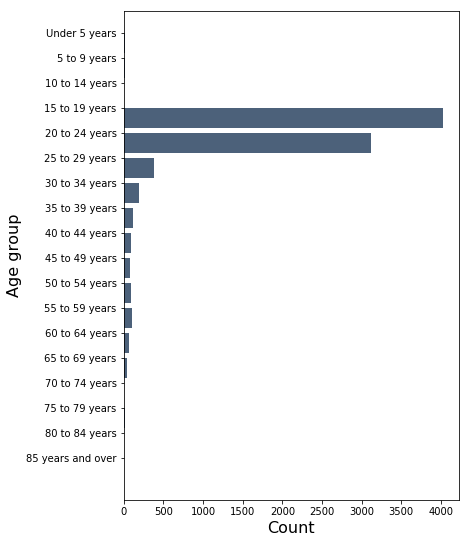

In [151]:
tograph.relabel('Columns', 'Age group') #Change the name of the first column from 'Column' to 'Age group'
tograph.relabel('Values', 'Count') #Change the name of the second column from 'Values' to 'Count
tograph.barh('Age group') #barh makes a bar graph, the h is for horizontal bar graphs

# Linear Algebra 

We have introduced basic concepts of Linear Algebra and how to use the numpy library.

In [5]:
a = np.array([1,2,3])            # 1D array construction
a

array([1, 2, 3])

In [6]:
b = np.array([[4,-5], [-2,3]])   # 2D array contruction
b

array([[ 4, -5],
       [-2,  3]])

In [7]:
E = np.identity(3);              # 3x3 identity matrix
E

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [12]:
X = np.random.rand(5,4) #Create a 5 x 4 matrix with random inputs [0,1)
Y = np.random.rand(5,4) #Create a 5 x 4 matrix with random inputs [0,1)
X

array([[ 0.05853359,  0.90210603,  0.0238279 ,  0.23005007],
       [ 0.01808317,  0.31759528,  0.72603406,  0.07884717],
       [ 0.74042758,  0.82599954,  0.28972198,  0.24967065],
       [ 0.12979993,  0.96120652,  0.03184513,  0.22000266],
       [ 0.08707262,  0.38721244,  0.57585433,  0.42350854]])

In [13]:
X+Y #Elementwise addition 

array([[ 0.56841156,  0.95247372,  0.48721111,  0.65236512],
       [ 0.68182324,  0.83769835,  1.33267324,  0.62779161],
       [ 0.86135342,  1.65253986,  0.51779162,  1.16714017],
       [ 0.58704008,  0.9945356 ,  0.21951998,  0.49753703],
       [ 0.65559848,  0.38761224,  1.20097856,  1.30615226]])

In [16]:
X*Y #Elementwise multiplication

array([[  2.98449894e-02,   4.54369967e-02,   1.10414475e-02,
          9.71536069e-02],
       [  1.20025229e-02,   1.65182278e-01,   4.40440705e-01,
          4.32827160e-02],
       [  8.95368243e-02,   6.82721928e-01,   6.60767874e-02,
          2.29065211e-01],
       [  5.93497399e-02,   3.20361296e-02,   5.97653050e-03,
          6.10582991e-02],
       [  4.95030367e-02,   1.54805534e-04,   3.59980496e-01,
          3.73807152e-01]])

In [18]:
X/Y #Elementwise division

array([[  1.14799220e-01,   1.79104111e+01,   5.14215800e-02,
          5.44735654e-01],
       [  2.72443509e-02,   6.10639108e-01,   1.19681365e+00,
          1.43634155e-01],
       [  6.12298916e+00,   9.99345733e-01,   1.27032240e+00,
          2.72129636e-01],
       [  2.83876929e-01,   2.88398751e+01,   1.69682475e-01,
          7.92704210e-01],
       [  1.53155074e-01,   9.68527868e+02,   9.21183831e-01,
          4.79818219e-01]])

In [20]:
X*2  #Multiply 

array([[ 0.11706719,  1.80421206,  0.04765579,  0.46010013],
       [ 0.03616633,  0.63519055,  1.45206811,  0.15769434],
       [ 1.48085516,  1.65199909,  0.57944395,  0.4993413 ],
       [ 0.25959986,  1.92241304,  0.06369027,  0.44000532],
       [ 0.17414524,  0.77442488,  1.15170867,  0.84701708]])